# Logistic Regression Example

A logistic regression learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/)

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
# data augment here
mnist.train.

In [26]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
batch_size = 100
display_step = 5

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1)) 

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# Start training
CV_accuracy = []
CV_epoch = []
train_cost = []
CV_cost = []
test_accuracy = []
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})

            # Compute average loss
            avg_cost += c / total_batch
        train_cost = train_cost + [avg_cost]
        CV_cost = CV_cost + [sess.run(cost, feed_dict = {x: mnist.test.images[:5000], y: mnist.test.labels[:5000]})]
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        
        if ((epoch+1)%10 == 0):
            # Test model
            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            # Calculate accuracy for CV and test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            cv_acc = accuracy.eval({x: mnist.test.images[:5000], y: mnist.test.labels[:5000]})
            test_acc = accuracy.eval({x: mnist.test.images[5000:], y: mnist.test.labels[5000:]})
            CV_accuracy = CV_accuracy + [cv_acc]
            test_accuracy = test_accuracy + [test_acc]
            CV_epoch = CV_epoch + [epoch]
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for test examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Test Accuracy:", accuracy.eval({x: mnist.test.images[5000:], y: mnist.test.labels[5000:]}))

Epoch: 0005 cost= 0.466207468
Epoch: 0010 cost= 0.393380921
Epoch: 0015 cost= 0.361525591
Epoch: 0020 cost= 0.344497984
Epoch: 0025 cost= 0.332863596
Epoch: 0030 cost= 0.324824511
Epoch: 0035 cost= 0.318497198
Epoch: 0040 cost= 0.312259854
Epoch: 0045 cost= 0.309207928
Epoch: 0050 cost= 0.304983515
Epoch: 0055 cost= 0.302419297
Epoch: 0060 cost= 0.298909016
Epoch: 0065 cost= 0.295941762
Epoch: 0070 cost= 0.292341861
Epoch: 0075 cost= 0.293436488
Epoch: 0080 cost= 0.289698061
Epoch: 0085 cost= 0.287377481
Epoch: 0090 cost= 0.285100655
Epoch: 0095 cost= 0.286220975
Epoch: 0100 cost= 0.282261527
Epoch: 0105 cost= 0.283139964
Epoch: 0110 cost= 0.280032191
Epoch: 0115 cost= 0.278197506
Epoch: 0120 cost= 0.280207537
Epoch: 0125 cost= 0.278057740
Epoch: 0130 cost= 0.276529189
Epoch: 0135 cost= 0.276505910
Epoch: 0140 cost= 0.275618547
Epoch: 0145 cost= 0.272799041
Epoch: 0150 cost= 0.273717604
Epoch: 0155 cost= 0.272914163
Epoch: 0160 cost= 0.274036620
Epoch: 0165 cost= 0.270780715
Epoch: 017

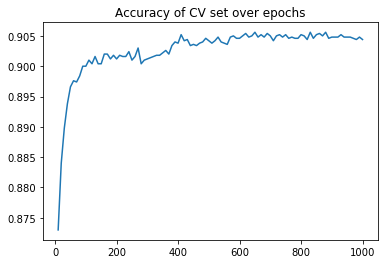

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(CV_epoch,CV_accuracy,label="CV set accuracy")
plt.plot(CV_epoch,test_accuracy,label="Test set accuracy")
plt.title("Accuracy of CV set over epochs")
plt.legend()

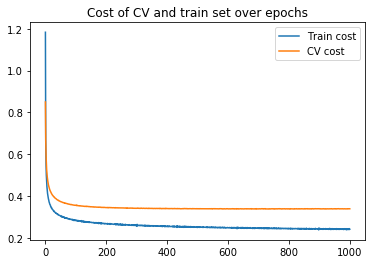

In [44]:
plt.plot(train_cost, label="Train cost")
plt.plot(CV_cost, label="CV cost")
plt.title("Cost of CV and train set over epochs")
plt.legend()